In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [13]:
np.array([1, 2, 3, 4, 5])[:r(3)]

array([1, 2, 3, 4, 5])

In [7]:
def feature_extraction0(img: np.ndarray) -> np.ndarray:
    # Convert to grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Detect corners
    corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)
    # Draw corners
    corners = corners.astype(np.intp) # np.int0(corners)
    for i in corners:
        x, y = i.ravel()
        cv.circle(img, (x, y), 3, 255, -1)
    return img

In [2]:
img = cv.imread('example/1.jpg')

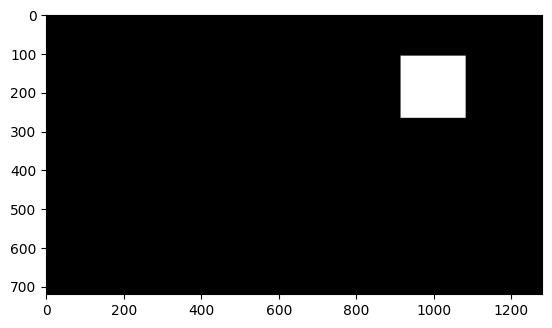

In [3]:
# Convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY).astype(np.int16)
# gray = cv.resize(gray, None, fx = 0.5, fy = 0.5, interpolation = cv.INTER_AREA)
# # clear noise
# gray = cv.GaussianBlur(gray, (5, 5), 0)

# plot
plt.imshow(gray, cmap='gray')
plt.show()

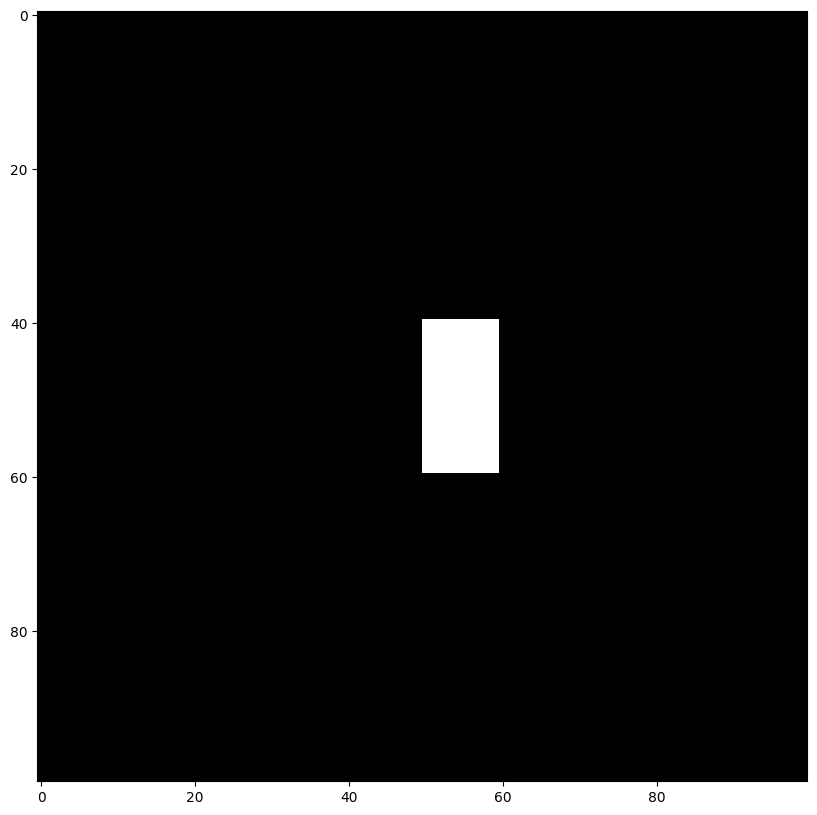

In [51]:
gray = np.zeros((100, 100), dtype=np.int32)
gray[40:60, 50:60] = 255
# cv.GaussianBlur(gray, (5, 5), 0, gray)
gary = gray.astype(np.int32)

plt.imshow(gray, cmap='gray')
plt.gcf().set_size_inches(16, 10)
plt.show()

In [52]:
def pos(x): return x if x > 0 else None

def neg(x): return x if x < 0 else None

In [53]:
R = np.zeros((gray.shape[0], gray.shape[1]), dtype=np.int32)

for w_size in [5,11]:
    offset = w_size//2
    uvs = [(u-offset, v-offset) for u in range(w_size) for v in range(w_size)]
    print(uvs)
    # Compute the response of the detector at each pixel
    R_ = np.zeros((gray.shape[0], gray.shape[1]), dtype=np.int32)
    for u, v in uvs:
        diff = gray[pos(u):neg(u), pos(v):neg(v)] - gray[pos(-u):neg(-u), pos(-v):neg(-v)]
        R_[pos(u):neg(u), pos(v):neg(v)] += diff * diff
    R_ = R_ / w_size**2
    R = np.maximum(R, R_)

print(R.dtype)
print(R.max())

[(-2, -2), (-2, -1), (-2, 0), (-2, 1), (-2, 2), (-1, -2), (-1, -1), (-1, 0), (-1, 1), (-1, 2), (0, -2), (0, -1), (0, 0), (0, 1), (0, 2), (1, -2), (1, -1), (1, 0), (1, 1), (1, 2), (2, -2), (2, -1), (2, 0), (2, 1), (2, 2)]
[(-5, -5), (-5, -4), (-5, -3), (-5, -2), (-5, -1), (-5, 0), (-5, 1), (-5, 2), (-5, 3), (-5, 4), (-5, 5), (-4, -5), (-4, -4), (-4, -3), (-4, -2), (-4, -1), (-4, 0), (-4, 1), (-4, 2), (-4, 3), (-4, 4), (-4, 5), (-3, -5), (-3, -4), (-3, -3), (-3, -2), (-3, -1), (-3, 0), (-3, 1), (-3, 2), (-3, 3), (-3, 4), (-3, 5), (-2, -5), (-2, -4), (-2, -3), (-2, -2), (-2, -1), (-2, 0), (-2, 1), (-2, 2), (-2, 3), (-2, 4), (-2, 5), (-1, -5), (-1, -4), (-1, -3), (-1, -2), (-1, -1), (-1, 0), (-1, 1), (-1, 2), (-1, 3), (-1, 4), (-1, 5), (0, -5), (0, -4), (0, -3), (0, -2), (0, -1), (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, -5), (1, -4), (1, -3), (1, -2), (1, -1), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, -5), (2, -4), (2, -3), (2, -2), (2, -1), (2, 0), (2, 1), (2, 2), (2,

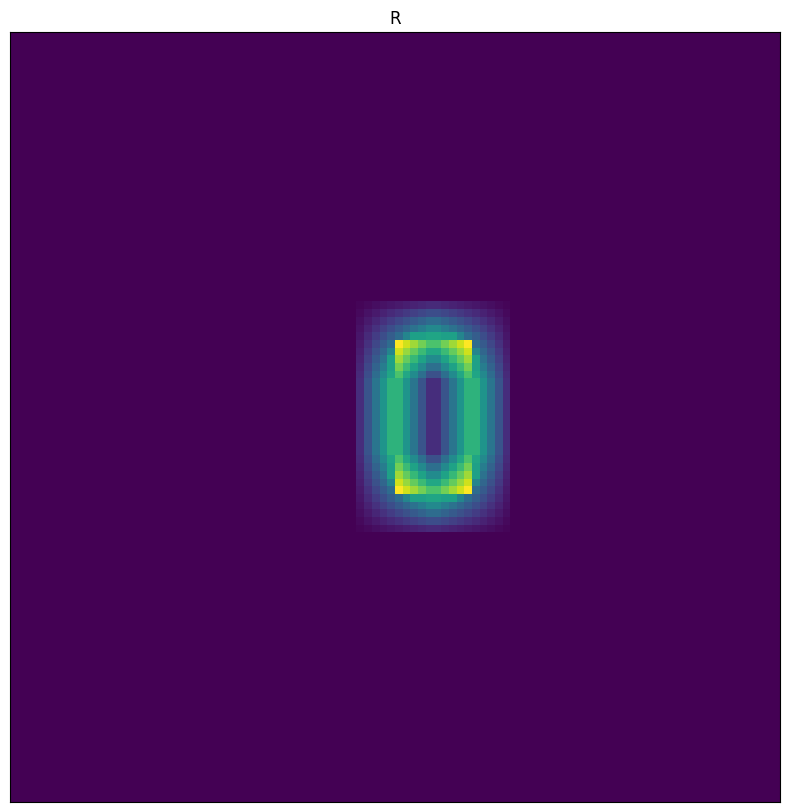

In [54]:
R2 = R
# print 2 digits after the decimal point
# plot
plt.imshow(R2)
plt.title('R'), plt.xticks([]), plt.yticks([])
plt.gcf().set_size_inches(16, 10)
plt.show()

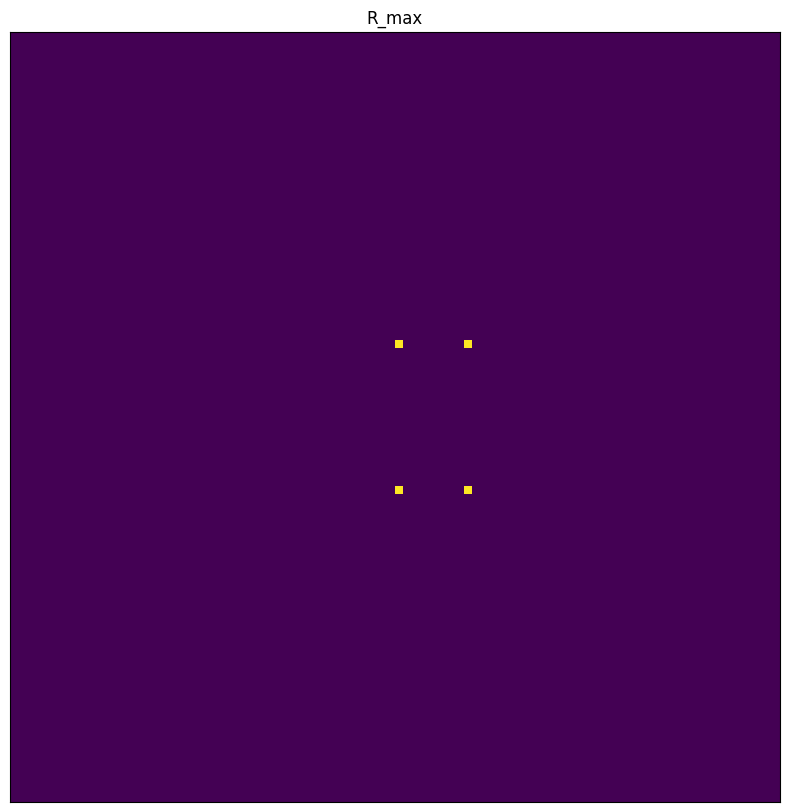

In [55]:
# get loacl maxima
R_max = np.zeros((R2.shape[0], R2.shape[1]), dtype=np.bool_)

# R_max[2:-2, 2:-2] = 1

# for u in range(5):
#     for v in range(5):
#         if u == 1 and v == 1:
#             continue
#         # print(u, v)
#         # print(R_max[2:-2,2:-2].shape, R2[2:-2, 2:-2].shape, R2[u:-4+u or None, v:-4+v or None].shape)
#         R_max[2:-2,2:-2] *= R2[2:-2, 2:-2] > R2[u:-4+u or None, v:-4+v or None]
R_max[1:-1,1:-1] = R2[1:-1, 1:-1] > R2[:-2, :-2]
R_max[1:-1,1:-1] *= R2[1:-1, 1:-1] > R2[:-2, 1:-1]
R_max[1:-1,1:-1] *= R2[1:-1, 1:-1] > R2[:-2, 2:]
R_max[1:-1,1:-1] *= R2[1:-1, 1:-1] > R2[1:-1, :-2]
R_max[1:-1,1:-1] *= R2[1:-1, 1:-1] > R2[1:-1, 2:]
R_max[1:-1,1:-1] *= R2[1:-1, 1:-1] > R2[2:, :-2]
R_max[1:-1,1:-1] *= R2[1:-1, 1:-1] > R2[2:, 1:-1]
R_max[1:-1,1:-1] *= R2[1:-1, 1:-1] > R2[2:, 2:]

# plot
plt.imshow(R_max)
plt.title('R_max'), plt.xticks([]), plt.yticks([])

plt.gcf().set_size_inches(16, 10)
plt.show()

In [56]:
corners = np.argwhere(R_max)
corners

array([[40, 50],
       [40, 59],
       [59, 50],
       [59, 59]], dtype=int64)

In [57]:
grads = np.zeros((corners.shape[0], 2), dtype=np.int16)
# for i, (x, y) in enumerate(corners):
#     dx = gray[x+1, y] - gray[x-1, y]
#     dy = gray[x, y+1] - gray[x, y-1]
#     grads[i] = [dx, dy]

# now, vectorized:
grads[:,0] = gray[corners[:, 0]+1, corners[:, 1]] - gray[corners[:, 0]-1, corners[:, 1]]
grads[:,1] = gray[corners[:, 0], corners[:, 1]+1] - gray[corners[:, 0], corners[:, 1]-1]

angles = np.arctan2(grads[:, 1], grads[:, 0])
angles = np.degrees(angles)
angles

array([  45.,  -45.,  135., -135.], dtype=float32)

In [3]:
def rotate_patch(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    ratio = 1.
    rot_mat = cv.getRotationMatrix2D(image_center, angle, ratio)
    result = cv.warpAffine(
        image, rot_mat, (44,44), flags=cv.INTER_LINEAR)
    return result


patches = np.zeros((corners.shape[0], 8, 8), dtype=np.float64)
for i, (x, y) in enumerate(corners):
    patches[i] = cv.pyrDown(cv.pyrDown(rotate_patch(
        gray[x-22:x+22, y-22:y+22].astype(np.uint8), -angles[i])[6:-6, 6:-6]))
    patches[i] -= patches[i].mean()
    patches[i] /= patches[i].std()
    

# plot
for i in range(4):
    plt.subplot(1, 5, i+1), plt.imshow(patches[i], cmap='gray')
    plt.title(f'pathes[{i}]'), plt.xticks([]), plt.yticks([])
plt.show()

NameError: name 'corners' is not defined

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def pos(x): return x if x > 0 else None


def neg(x): return x if x < 0 else None


def rotate_patch(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    ratio = 1.
    rot_mat = cv.getRotationMatrix2D(image_center, angle, ratio)
    result = cv.warpAffine(
        image, rot_mat, (44, 44), flags=cv.INTER_LINEAR)
    return result


def provide_corners(image, min_ratio=0.1):
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    gray = gray.astype(np.int32)

    R = np.zeros((gray.shape[0], gray.shape[1]), dtype=np.int32)

    for w_size in [5, 11, 21]:
        offset = w_size//2
        uvs = [(u-offset, v-offset)
               for u in range(w_size) for v in range(w_size)]
        # Compute the response of the detector at each pixel
        R_ = np.zeros((gray.shape[0], gray.shape[1]), dtype=np.int32)
        for u, v in uvs:
            diff = gray[pos(u):neg(u), pos(v):neg(v)] - \
                gray[pos(-u):neg(-u), pos(-v):neg(-v)]
            R_[pos(u):neg(u), pos(v):neg(v)] += diff * diff
        R_ = R_ / w_size**2
        R = np.maximum(R, R_)

    R2 = R * (R > min_ratio * R.max())


    # get loacl maxima
    R_max = np.zeros((R2.shape[0], R2.shape[1]), dtype=np.bool_)

    R_max[1:-1, 1:-1] = R2[1:-1, 1:-1] > R2[:-2, :-2]
    R_max[1:-1, 1:-1] *= R2[1:-1, 1:-1] > R2[:-2, 1:-1]
    R_max[1:-1, 1:-1] *= R2[1:-1, 1:-1] > R2[:-2, 2:]
    R_max[1:-1, 1:-1] *= R2[1:-1, 1:-1] > R2[1:-1, :-2]
    R_max[1:-1, 1:-1] *= R2[1:-1, 1:-1] > R2[1:-1, 2:]
    R_max[1:-1, 1:-1] *= R2[1:-1, 1:-1] > R2[2:, :-2]
    R_max[1:-1, 1:-1] *= R2[1:-1, 1:-1] > R2[2:, 1:-1]
    R_max[1:-1, 1:-1] *= R2[1:-1, 1:-1] > R2[2:, 2:]

    corners = np.argwhere(R_max)
    return corners, R[corners[:, 0], corners[:, 1]]


def provide_patches(image, corners):
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    gray = gray.astype(np.int32)

    grads = np.zeros((corners.shape[0], 2), dtype=np.int16)
    grads[:, 0] = gray[corners[:, 0]+1, corners[:, 1]] - \
        gray[corners[:, 0]-1, corners[:, 1]]
    grads[:, 1] = gray[corners[:, 0], corners[:, 1]+1] - \
        gray[corners[:, 0], corners[:, 1]-1]

    angles = np.arctan2(grads[:, 1], grads[:, 0])
    angles = np.degrees(angles)

    patches = np.zeros((corners.shape[0], 8, 8, 3), dtype=np.float64)
    for i, (x, y) in enumerate(corners):
        if x-22 < 0 or x+22 > image.shape[0] or y-22 < 0 or y+22 > image.shape[1]:
            continue
        patches[i] = cv.pyrDown(cv.pyrDown(rotate_patch(
            image[x-22:x+22, y-22:y+22].astype(np.uint8), -angles[i])[6:-6, 6:-6]))
        patches[i] -= patches[i].mean()
        patches[i] /= patches[i].std()

    return patches

In [72]:
img1 = cv.imread('input/desert_high_res.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
blurred1 = cv.GaussianBlur(img1, (5, 5), 0)
corners1, corners1_R = provide_corners(blurred1, 0.1)
patches1 = provide_patches(blurred1, corners1)

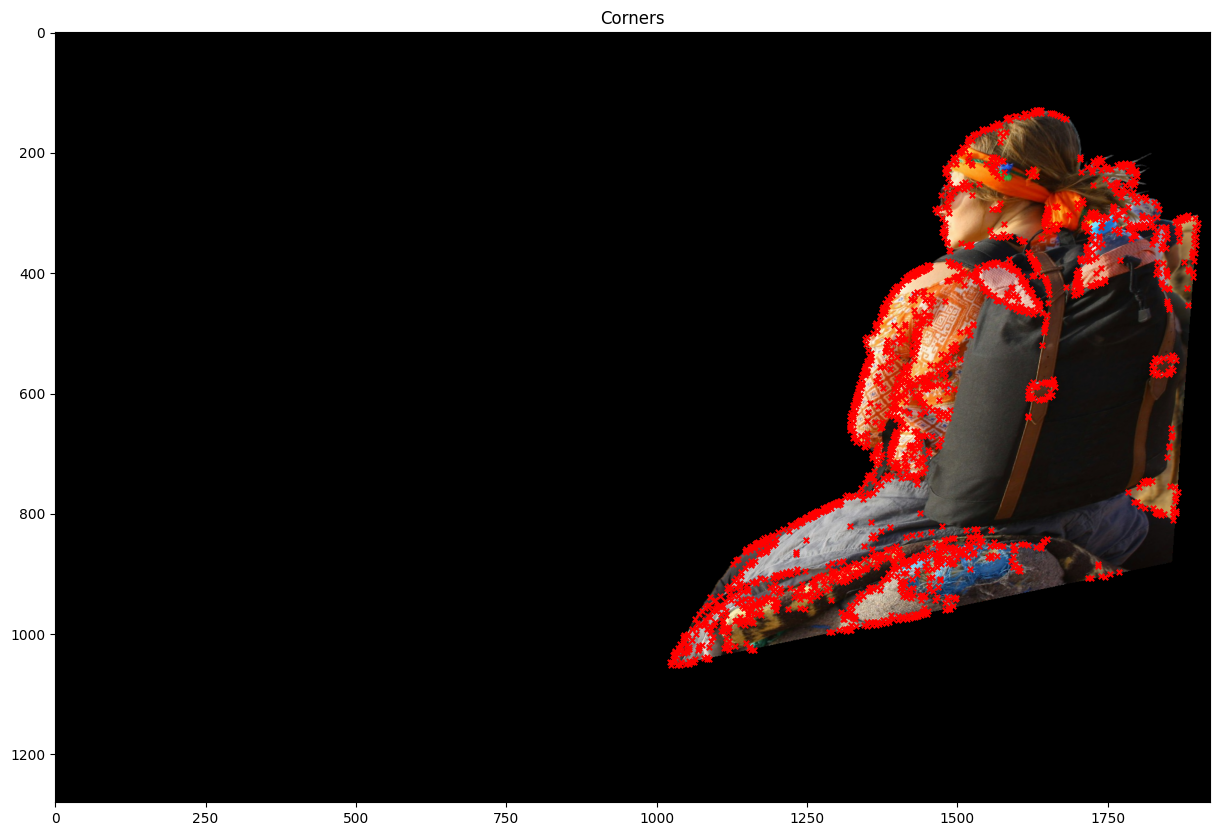

In [73]:
# plot the image with circles at the corners
plt.imshow(img1)
plt.scatter(corners1[:, 1], corners1[:, 0], s=15, c='r', marker='x')

plt.title('Corners')
plt.gcf().set_size_inches(16, 10)
plt.show()

In [68]:
img2 = cv.imread('input/desert_low_res.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
blurred2 = cv.GaussianBlur(img2, (5, 5), 0)
corners2, corners2_R = provide_corners(blurred2, 0.1)
patches2 = provide_patches(blurred2, corners2)

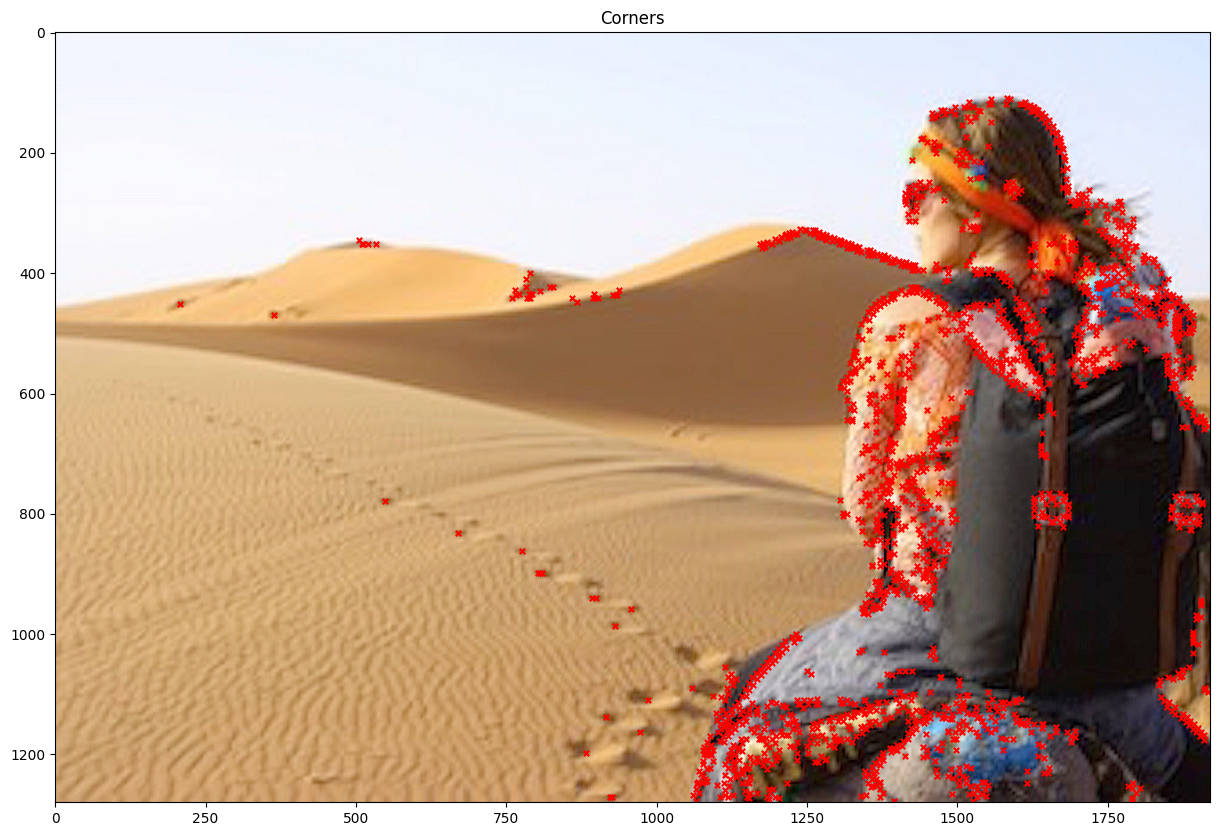

In [69]:
# plot the image with circles at the corners
plt.imshow(img2)
plt.scatter(corners2[:, 1], corners2[:, 0], s=15, c='r', marker='x')

plt.title('Corners')
plt.gcf().set_size_inches(16, 10)
plt.show()

In [70]:
def find_similar_patch_index(patch, patches, threshold=0.6):
    min1 = np.inf
    min2 = np.inf
    min_idx1 = 0
    for i in range(patches.shape[0]):
        dist = np.linalg.norm(patch - patches[i])
        if dist < min1:
            min2 = min1
            min1 = dist
            min_idx1 = i
        elif dist < min2:
            min2 = dist
    if min2 == 0:
        return None
    if min1/min2 < threshold:
        return min_idx1
    return None


In [74]:
matches = []
for i, patch in enumerate(patches1):
    index = find_similar_patch_index(patch, patches2,0.9)
    if index is not None:# and np.linalg.norm(corners1[i] - corners2[index]) <= 400:
        matches.append((i, index))
matches = np.array(matches)
corners1_m = corners1[matches[:,0]]
corners2_m = corners2[matches[:,1]]
print(matches.shape[0])

430


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


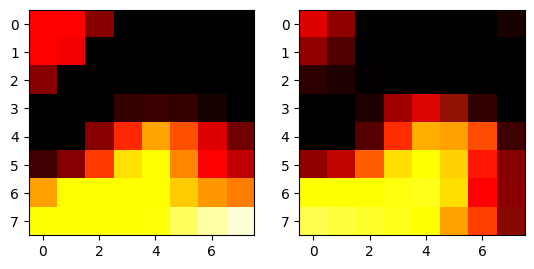

In [75]:
i = (i + 1) % matches.shape[0]
plt.subplot(1, 2, 1)
plt.imshow(patches1[matches[i, 0]])
plt.subplot(1, 2, 2)
plt.imshow(patches2[matches[i, 1]])
plt.show()

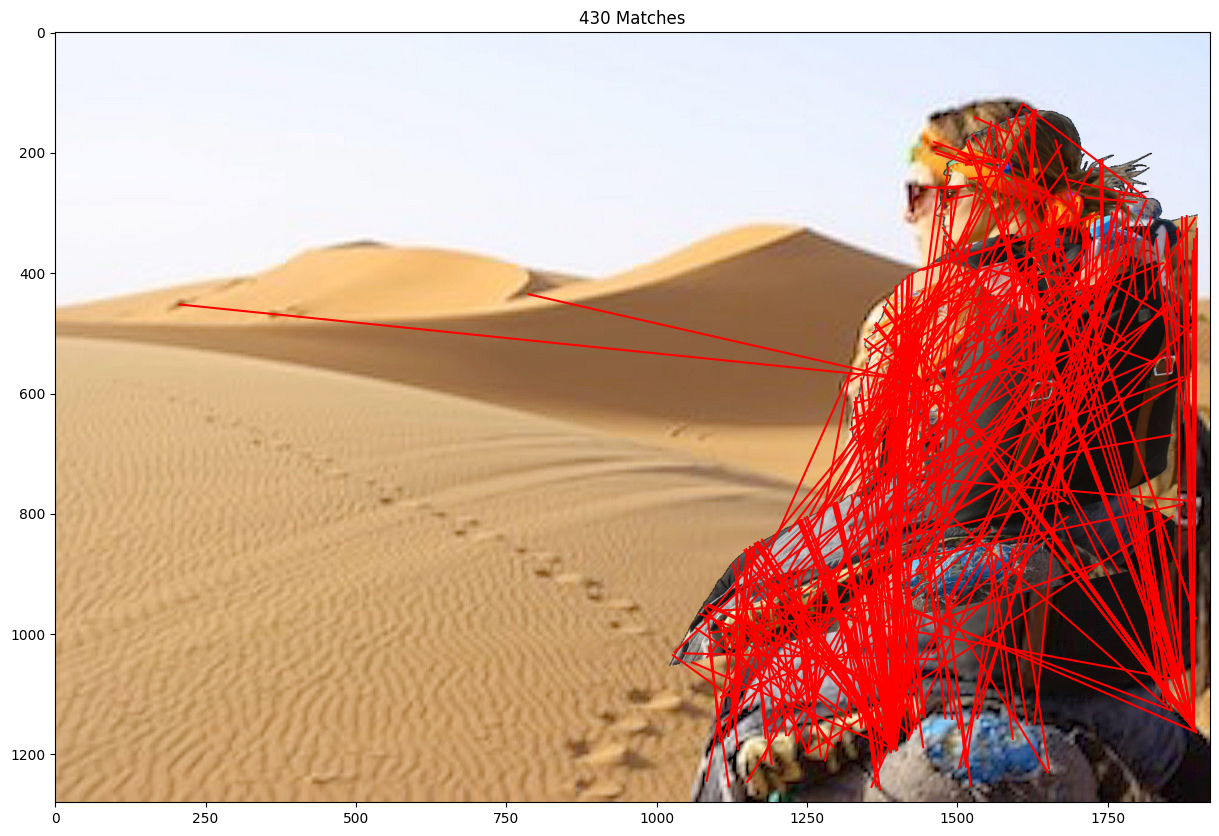

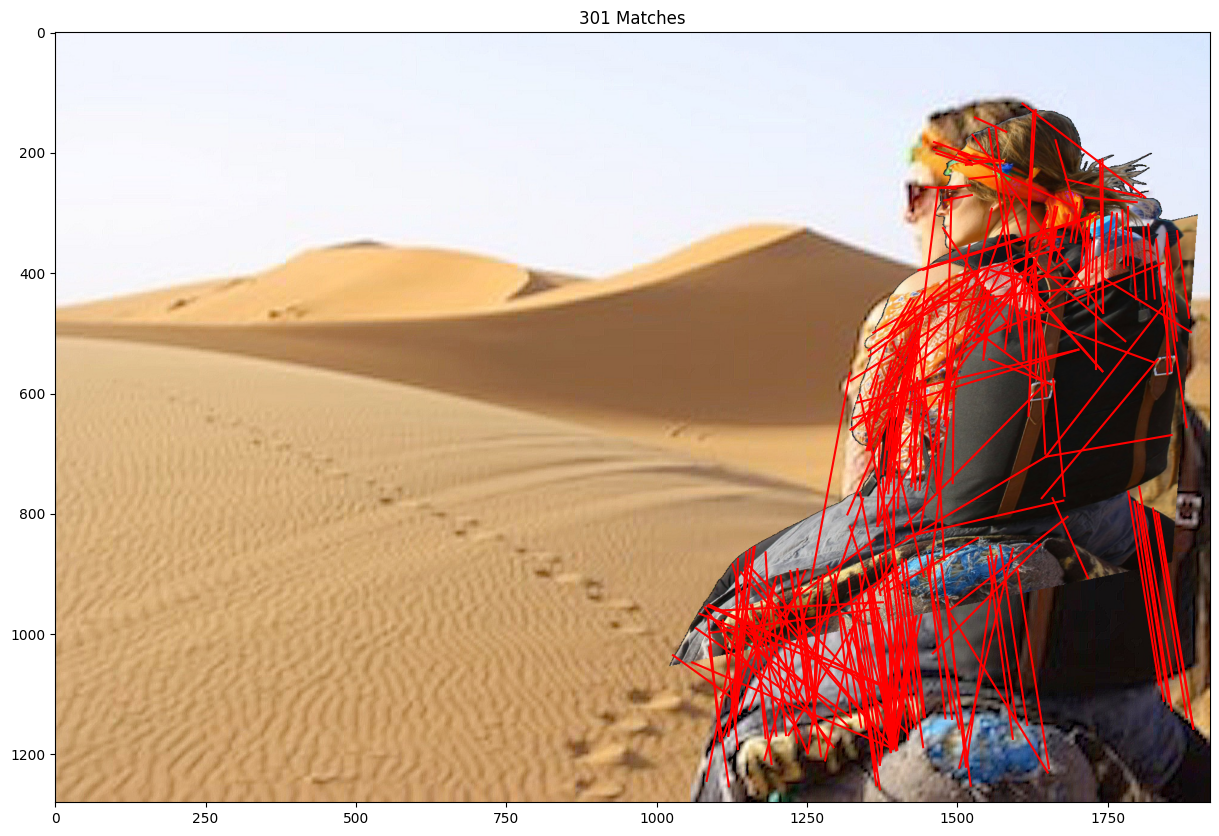

In [78]:
# 0,1,3,81

img21 = img2 * (img1 == 0) + img1
plt.imshow(img21)
m = 0
for match in matches[:]:
    m += 1
    plt.plot([corners1[match[0], 1], corners2[match[1], 1]], [
             corners1[match[0], 0], corners2[match[1], 0]], 'r-')
plt.title(f'{m} Matches')
plt.gcf().set_size_inches(16, 10)
plt.show()

plt.imshow(img21)
m = 0
for match in matches[:]:
    if np.linalg.norm(corners1[match[0]] - corners2[match[1]]) <= 400:
        m += 1
        plt.plot([corners1[match[0], 1], corners2[match[1], 1]], [
             corners1[match[0], 0], corners2[match[1], 0]], 'r-')
plt.title(f'{m} Matches')
plt.gcf().set_size_inches(16, 10)
plt.show()

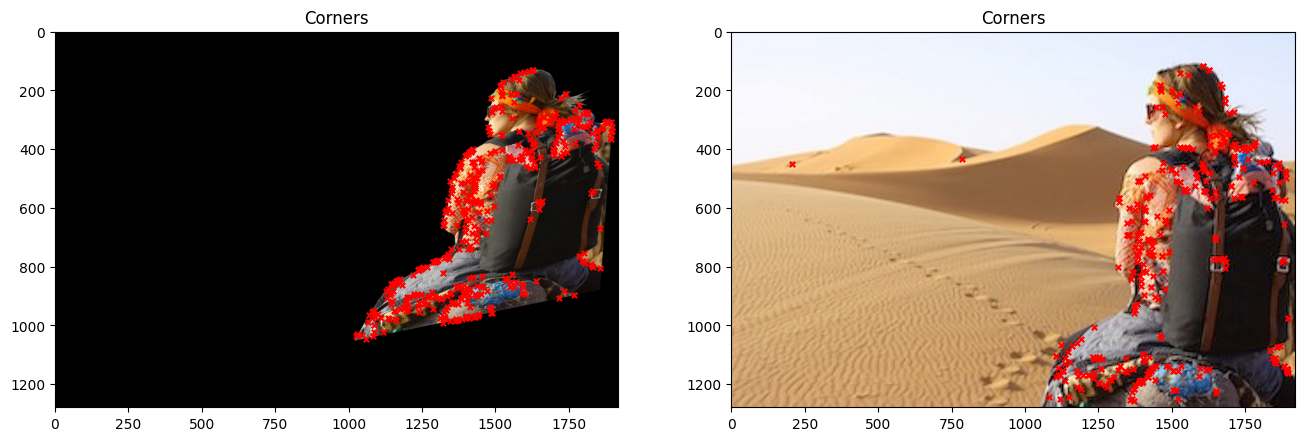

In [79]:
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.scatter(corners1_m[:, 1], corners1_m[:, 0], s=15, c='r', marker='x')
plt.title('Corners')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.scatter(corners2_m[:, 1], corners2_m[:, 0], s=15, c='r', marker='x')
plt.title('Corners')

plt.gcf().set_size_inches(16, 5)
plt.show()

In [94]:
# RANSAC

def flip_xy(corners):
    return np.array([corners[:, 1], corners[:, 0]]).T

def ransac(corners1, corners2, n_iters=1000, threshold=5):
    corners1 = flip_xy(corners1)
    corners2 = flip_xy(corners2)
    best_model = None
    best_inliers = 0
    for _ in range(n_iters):
        idx = np.random.choice(corners1.shape[0], 4, replace=False)
        c1 = corners1[idx].astype(np.float32)
        c2 = corners2[idx].astype(np.float32)
        model = cv.getPerspectiveTransform(c1,c2)
        corners1_t = cv.perspectiveTransform(corners1.reshape(-1, 1, 2).astype(np.float32), model)
        dist = np.linalg.norm(corners1_t.reshape(-1, 2) - corners2, axis=1)
        inliers = np.sum(dist < threshold)
        if inliers > best_inliers:
            best_inliers = inliers
            best_model = model
    return best_model, best_inliers

model, inliers = ransac(corners1_m, corners2_m, 100000, 10)
print(inliers)

115


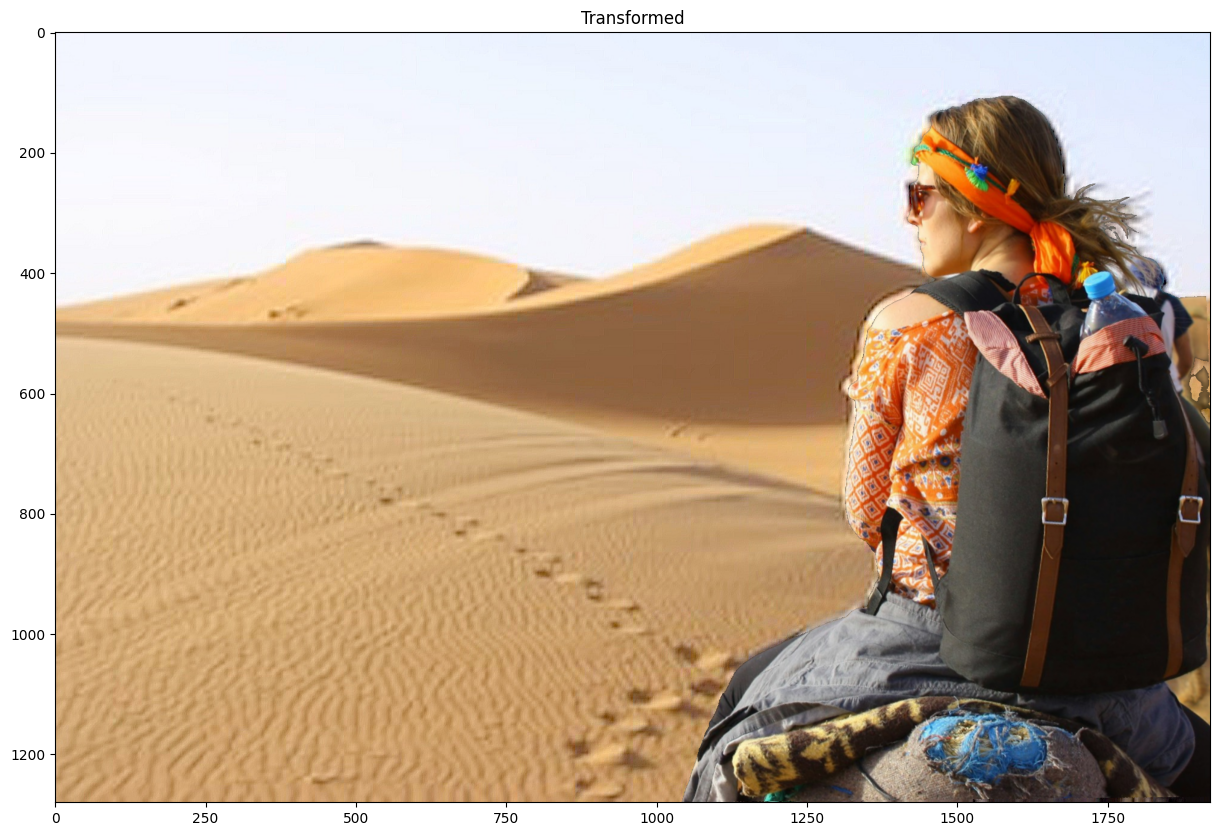

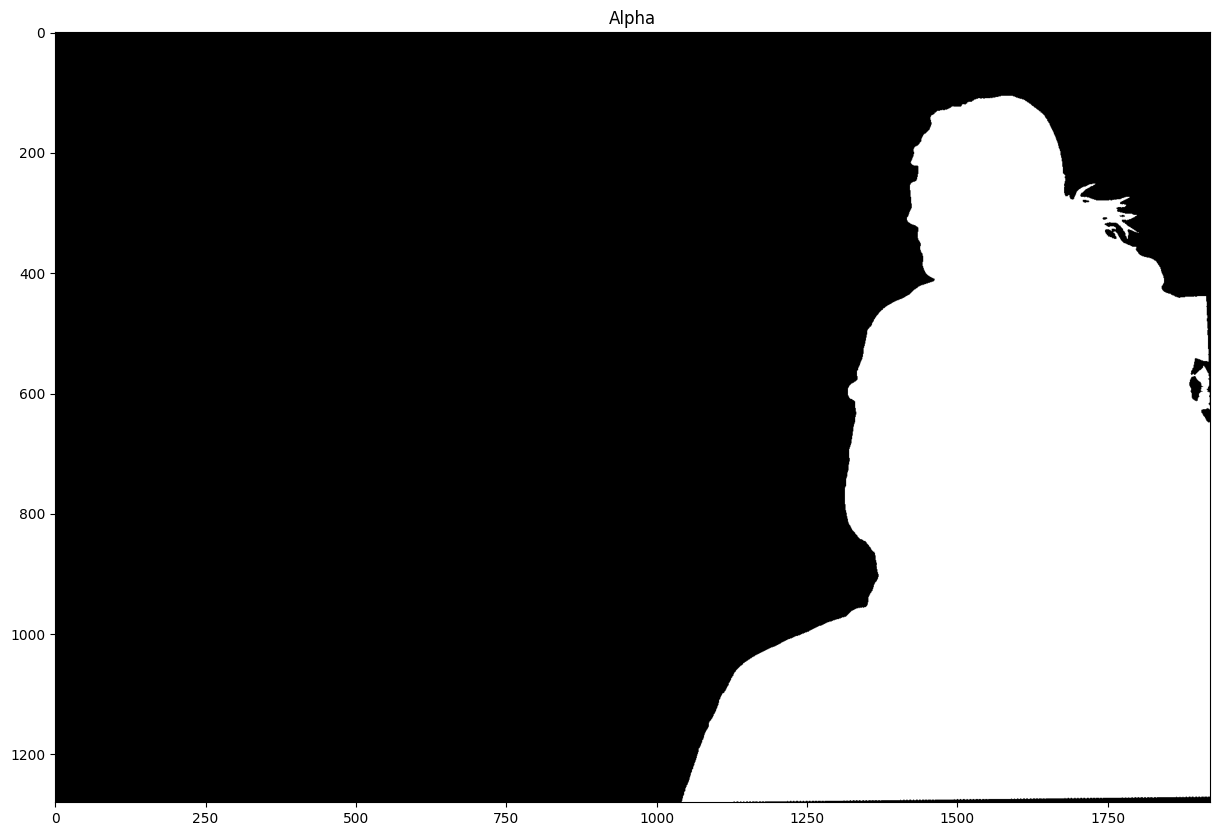

In [95]:
img1 = cv.imread('input/desert_high_res.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('input/desert_low_res.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img1_t = cv.warpPerspective(img1, model, (img1.shape[1], img1.shape[0]))
alpha = cv.imread('input/desert_high_res.png', cv.IMREAD_UNCHANGED)[:,:,-1]
mask = cv.warpPerspective(alpha,model, (img1.shape[1], img1.shape[0])) > 230
img21 = img2
# mask = (img1_t[:,:,0] > 0) * (img1_t[:,:,1] > 0) * (img1_t[:,:,2] > 0)
img21[:,:,0] = img2[:,:,0] * (1 - mask) + img1_t[:,:,0] * mask
img21[:,:,1] = img2[:,:,1] * (1 - mask) + img1_t[:,:,1] * mask
img21[:,:,2] = img2[:,:,2] * (1 - mask) + img1_t[:,:,2] * mask

cv.imwrite('lake_output.png', cv.cvtColor(img21, cv.COLOR_RGB2BGR))

plt.imshow(img21)
plt.title('Transformed')
plt.gcf().set_size_inches(16, 10)
plt.show()

plt.imshow(mask, cmap='gray')
plt.title('Alpha')
plt.gcf().set_size_inches(16, 10)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


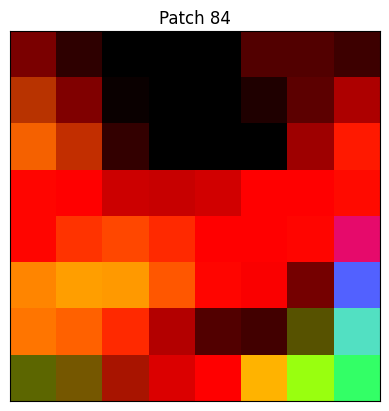

In [111]:
plt.imshow(patches1[i])
plt.title(f'Patch {i}'), plt.xticks([]), plt.yticks([])
i += 1
plt.show()

In [ ]:

n = len(corners1)
for i in range(max(n,7)):
    plt.subplot(1, n, i+1), plt.imshow(patches1[i])
    plt.title(f'pathes[{i}], {corners1[i]}'), plt.xticks([]), plt.yticks([])
plt.show()
n = len(corners2)
for i in range(max(n,7)):
    plt.subplot(1, n, i+1), plt.imshow(patches2[i])
    plt.title(f'pathes[{i}], {corners2[i]}'), plt.xticks([]), plt.yticks([])
plt.show()

# Compute the distance between the descriptors
distances = np.zeros((patches1.shape[0], patches2.shape[0]), dtype=np.float32)
for i in range(patches1.shape[0]):
    for j in range(patches2.shape[0]):
        distances[i, j] = np.linalg.norm(patches1[i] - patches2[j])
np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}".format(x)})
# distances

In [ ]:


blurred = cv.pyrDown(cv.pyrDown(gray))

# build descriptor for each corner
descriptors = []
for x, y in corners:
    # find the gradient of 8*8 window
    dx = blurred[x+1, y] - blurred[x-1, y]
    dy = blurred[x, y+1] - blurred[x, y-1]
    
    # take a 32*32 window around the corner with the direction of the gradient
    # and compute the histogram of the gradient
    cv.rotate(blurred[x-16:x+16, y-16:y+16])
    

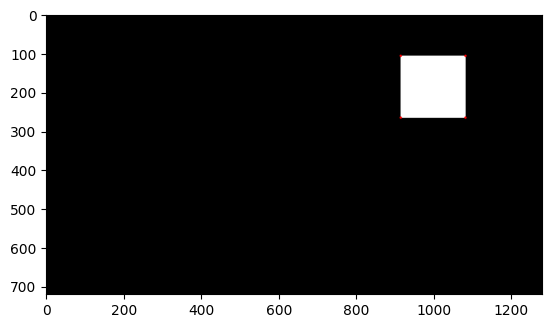

In [ ]:
my_im = cv.imread('example/1.jpg')
my_im = feature_extraction0(my_im)
plt.imshow(my_im)
plt.show()

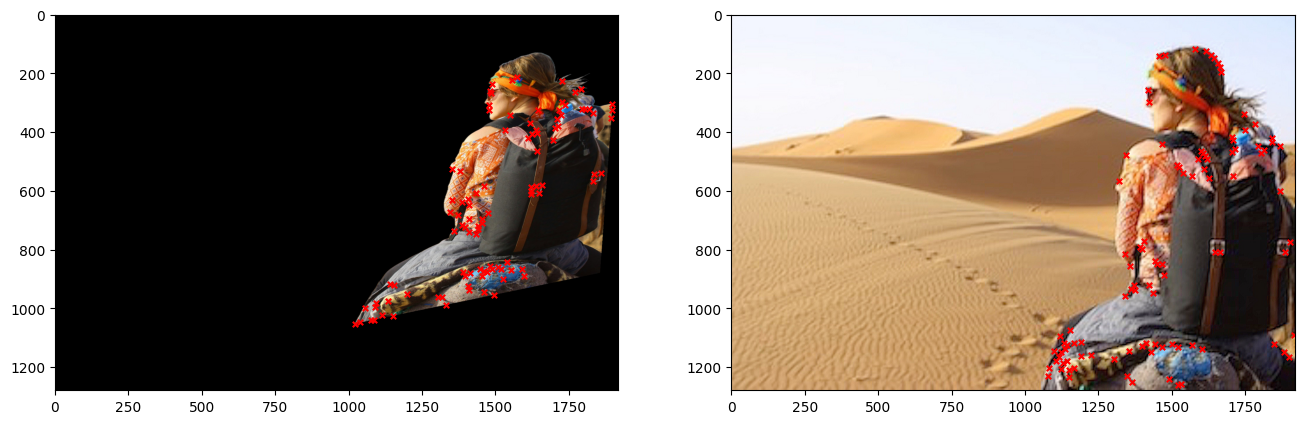

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\calib3d\src\fundam.cpp:385: error: (-28:Unknown error code -28) The input arrays should have at least 4 corresponding point sets to calculate Homography in function 'cv::findHomography'


In [145]:
img1 = cv.imread('input/desert_high_res.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('input/desert_low_res.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

features1 = cv.goodFeaturesToTrack(cv.cvtColor(img1, cv.COLOR_RGB2GRAY), 100, 0.01, 10)
features2 = cv.goodFeaturesToTrack(cv.cvtColor(img2, cv.COLOR_RGB2GRAY), 100, 0.01, 10)

features1 = features1.reshape(-1, 2).astype(np.int32)
features2 = features2.reshape(-1, 2).astype(np.int32)

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.scatter(features1[:, 0], features1[:, 1], s=15, c='r', marker='x')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.scatter(features2[:, 0], features2[:, 1], s=15, c='r', marker='x')

plt.gcf().set_size_inches(16, 5)
plt.show()

features1[:,0], features1[:,1] = features1[:,1], features1[:,0].copy()
features2[:,0], features2[:,1] = features2[:,1], features2[:,0].copy()

patches1 = provide_patches(img1, features1)
patches2 = provide_patches(img2, features2)

matches = []
for i, patch in enumerate(patches1):
    index = find_similar_patch_index(patch, patches2, 0.8)
    if index is not None:
        matches.append((i, index))
matches = np.array(matches)
corners1_m = features1[matches[:, 0]]
corners2_m = features2[matches[:, 1]]

corners1_m[:,0], corners1_m[:,1] = corners1_m[:,1], corners1_m[:,0].copy()
corners2_m[:,0], corners2_m[:,1] = corners2_m[:,1], corners2_m[:,0].copy()

corners1_m = corners1_m.reshape(-1, 1, 2).astype(np.float32)
corners2_m = corners2_m.reshape(-1, 1, 2).astype(np.float32)

model = cv.findHomography(corners1_m, corners2_m, cv.RANSAC, 5.0)[0]

img1_t = cv.warpPerspective(img1, model, (img1.shape[1], img1.shape[0]))
plt.imshow(img1_t)
plt.title('Transformed')
plt.gcf().set_size_inches(16, 10)
plt.show()